In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
import os
import numpy as np
from keras.preprocessing import image
import cv2
# import dlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

in this section, use SVM algorithm to train models

In [11]:
basedir = '.\\assignment_dataset'
images_dir = os.path.join(basedir,'image')
labels_filename = 'label.csv'
# print(images_dir)   # .\assignment_dataset\image


def extract_features_labels():
    """
    This funtion extracts the features for all images in the folder 'dataset/..'.
    It also extracts the tumor label for each image.
    :return:
        pic_features:  an array containing 68 landmark points for each image in which a face was detected
        tumor_labels:      an array containing the gender label (male=0 and female=1) for each image in
                            which a face was detected
    """

    all_features = []
    all_labels = []
    
    image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
#     print(image_paths)   # ‘.\\assignment_dataset\\image\\IMAGE_0032.jpg'
    labels_file = open(os.path.join(basedir, labels_filename), 'r')

    lines_of_label = labels_file.readlines()
#     print(lines_of_label)   # 'IMAGE_0000.jpg,meningioma_tumor,,脑膜瘤\n'

    type_labels = {line.split(',')[0] : line.split(',')[1] for line in lines_of_label[1:]}

    # convert tumor names to int
    for k,v in type_labels.items():
        if v == "meningioma_tumor\n":
            type_labels[k] = 1
        elif v == 'glioma_tumor\n':
            type_labels[k] = 2
        elif v == 'pituitary_tumor\n':
            type_labels[k] = 3
        elif v == 'no_tumor\n':
            type_labels[k] = 0

    
    for img in image_paths:
        # pic_features
        img_read = cv2.imread(img, flags = 0)  # 把图片转化成 numpy.ndarray，shape=(512, 512)
        img_read = cv2.pyrDown(img_read) 
        img_read = cv2.pyrDown(img_read) 
        all_features.append(img_read)   # list
        
        # tumor_labels
        file_name= img.split('\\')[-1]
        all_labels.append(type_labels[file_name])

    pic_features = np.array(all_features)
    tumor_labels = np.array(all_labels) 

    return pic_features, tumor_labels

def get_data():

    X,y = extract_features_labels()   
    # X: landmark_features - ndarray, shape = (134, 68, 2)
    # y: gender_labels - list, len= 134
    
    
    Y = np.array([y, -(y - 1)]).T   # Y: ndarray, shape = (134, 2)
    print(Y.shape)
    tr_X = X[:2000]
    tr_Y = Y[:2000]
    te_X = X[2000:]
    te_Y = Y[2000:]
    
    tr_X2 = tr_X.reshape((2000, 128*128))
    tr_Y2 = list(zip(*tr_Y))[0]
    te_X2 = te_X.reshape((1000, 128*128))
    te_Y2 = list(zip(*te_Y))[0]
    
    print()
    print("tr_X2:")
    print(tr_X2)
    print(tr_X2.shape)   # (100, 512*512)
    print(type(tr_X2))   # numpy.ndarray
    print()
    print("tr_Y2:")
    print(tr_Y2)
    print(type(tr_Y2))  # tuple
    print(len(tr_Y2))    # len=100
    print()
    print("te_X2:")
    print(te_X2.shape)   # (56, 512*512)
    print(type(te_X2))   # numpy.ndarray
    print()
    print("te_Y2:")
    print(te_Y2)
    print(type(te_Y2))  # tuple
    print(len(te_Y2))    # len=56
    
   


    return tr_X2, tr_Y2, te_X2, te_Y2


def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel='linear')

    classifier.fit(training_images, training_labels)

    pred = classifier.predict(test_images)

    print(pred)

    print("Accuracy:", accuracy_score(test_labels, pred))


tr_X, tr_Y, te_X, te_Y= get_data()
pred=img_SVM(tr_X, tr_Y, te_X, te_Y)
# 喂给机器的数据： 100个压缩成2维的array，长度为100的包含gender信息的元组，34个x_test，34个y_test            
            

img_read = cv2.imread('.\\assignment_dataset\\image\\IMAGE_0032.jpg')  # 把图片转化成 numpy.ndarray，shape=(512, 512, 3)
# print(type(img_read))
# print(img_read.shape)




img_keras = image.load_img('.\\assignment_dataset\\image\\IMAGE_0032.jpg',target_size = None)
# print(img_keras)

img_keras = image.load_img('.\\assignment_dataset\\image\\IMAGE_0032.jpg',target_size = None)
# print(img_keras)

img_keras = image.img_to_array(img_keras)
# print(img_keras[:,1,1])

(3000, 2)

tr_X2:
[[ 0  0  0 ...  2  1  1]
 [20 22 23 ...  1  3 22]
 [ 9  4  2 ...  0  0  1]
 ...
 [ 0  0  0 ...  2  1  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
(2000, 16384)
<class 'numpy.ndarray'>

tr_Y2:
(1, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1, 3, 3, 0, 0, 1, 3, 1, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 2, 3, 0, 2, 1, 2, 1, 2, 0, 3, 1, 2, 2, 2, 0, 2, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 3, 3, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 0, 1, 2, 1, 2, 1, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 1, 3, 2, 2, 1, 1, 0, 3, 3, 1, 2, 1, 3, 3, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 2, 1, 1, 2, 3, 2, 3, 1, 0, 2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 3, 3, 1, 2, 2, 0, 2, 1, 1, 2, 3, 3, 3, 1, 2, 0, 2, 1, 3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 2, 3, 0, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 2, 3, 2, 3, 3, 2, 1, 0, 0, 3, 3, 1, 0, 0, 1, 2, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 1, 3, 2, 1, 0, 2, 0,

[1 3 3 1 2 1 2 0 1 2 2 2 2 3 2 2 1 3 1 2 1 2 2 0 2 2 3 3 2 2 1 2 0 3 3 3 2
 3 0 1 3 0 1 3 1 1 1 3 2 1 0 1 3 2 0 1 3 0 1 3 1 3 3 2 3 1 3 2 1 2 2 1 3 1
 1 2 2 3 2 1 3 2 3 0 1 1 1 2 3 0 0 1 3 2 0 2 2 1 2 1 1 2 3 3 0 0 0 2 0 2 3
 0 1 2 3 1 2 1 3 3 3 2 1 1 2 0 3 2 2 1 3 1 1 3 2 3 2 2 0 1 1 1 3 3 3 2 1 0
 3 0 3 1 1 3 0 3 1 3 1 0 0 1 3 0 2 1 3 2 2 3 1 0 1 1 2 2 3 3 3 1 0 1 3 2 0
 2 3 1 3 2 3 0 1 2 3 3 3 2 2 2 1 3 3 2 1 1 3 0 2 3 1 2 2 1 1 1 3 2 3 2 2 3
 1 3 3 2 1 0 1 3 3 2 2 1 3 1 2 0 1 0 1 2 1 3 1 1 2 1 1 3 0 2 2 2 3 1 1 2 2
 3 1 2 0 1 2 1 2 3 1 3 2 3 2 1 2 3 1 3 3 0 2 1 2 1 1 1 3 1 3 1 2 3 3 3 0 1
 3 3 2 1 2 0 1 0 1 3 0 3 3 3 2 1 3 0 2 2 3 1 0 0 0 0 3 1 3 0 0 1 1 1 3 2 2
 2 1 0 1 3 0 3 1 3 2 2 2 1 3 3 2 3 1 2 0 1 0 0 0 3 3 3 1 2 2 3 2 0 2 1 2 3
 2 3 3 0 1 2 3 2 1 2 2 1 3 0 0 1 2 2 3 0 2 1 3 1 2 2 2 2 2 2 1 0 2 3 2 1 1
 0 3 1 1 0 1 2 0 1 3 3 1 3 3 3 1 1 2 0 3 0 3 1 2 1 0 3 2 1 2 1 2 0 3 2 0 2
 2 1 1 3 3 1 2 2 3 3 2 0 3 3 3 3 1 2 2 0 0 2 2 3 2 3 2 1 2 3 0 3 3 0 1 0 1
 1 1 1 1 3 1 1 0 1 3 3 0 

in this section, use different kernel functions and plot the support vectors

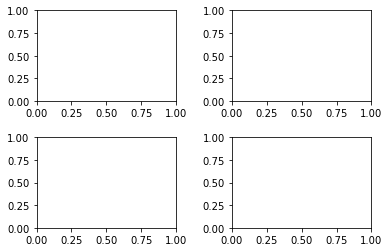

In [6]:
fig, sub = plt.subplots(2, 2) 
plt.subplots_adjust(wspace=0.4, hspace=0.4)  
X0, X1 = X[:, 0], X[:, 1]

in this section, use KNN algorithm to train models

In [15]:
def KNNClassifier(tr_X, tr_Y, te_X,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)   
    # KNeighborsClassifier 是自带的一个函数
    # 其中的一个参数 n_neighbors：k neighbors查询使用的邻居数。就是k-NN的k的值，选取最近的k个点
    neigh.fit(tr_X, tr_Y) # Fit KNN model


    Y_pred = neigh.predict(te_X)
    return Y_pred

Y_pred=KNNClassifier(tr_X, tr_Y, te_X,4)
print(Y_pred)
score=metrics.accuracy_score(te_Y,Y_pred)
print(score)

[2 3 2 1 2 0 2 3 2 2 0 2 2 3 0 1 2 3 3 3 1 1 2 2 2 2 3 3 0 2 2 2 2 3 3 3 1
 3 1 2 3 0 2 3 0 1 1 3 2 1 0 2 3 3 3 1 3 0 1 3 1 3 3 2 3 3 3 3 3 2 1 3 3 2
 1 2 2 3 2 1 3 0 3 0 1 1 3 2 3 0 1 1 3 2 2 0 2 1 3 3 1 2 3 3 0 0 0 2 0 2 3
 0 2 2 3 1 2 2 3 3 3 2 1 3 2 0 3 2 2 1 2 2 0 3 1 3 0 2 3 3 1 1 2 3 3 2 0 0
 3 0 3 1 1 3 0 3 2 3 0 0 1 1 3 0 2 1 3 2 2 3 1 0 1 1 2 2 3 1 3 1 0 1 3 1 2
 2 3 1 3 2 3 0 1 2 3 3 3 2 2 2 3 3 3 2 0 1 3 1 1 3 0 3 2 1 2 0 3 1 3 1 2 3
 1 3 3 1 2 0 1 3 3 0 2 3 3 2 2 1 0 0 0 2 1 3 1 0 2 3 0 3 1 0 2 2 3 1 0 2 2
 3 0 3 0 0 2 1 2 0 3 3 1 3 1 1 1 0 2 3 3 0 3 2 2 2 1 1 3 2 3 1 2 3 0 3 0 1
 3 3 2 1 2 2 1 0 1 3 0 3 3 3 2 1 3 0 2 2 3 0 0 0 0 2 3 1 3 1 0 1 0 3 3 2 2
 2 0 0 1 3 1 3 1 3 2 1 2 0 3 3 2 3 0 2 0 1 3 0 0 3 3 0 2 2 2 3 0 0 2 3 2 3
 2 3 3 3 1 2 3 2 3 1 1 1 3 0 0 1 2 2 3 0 2 1 3 1 2 2 2 2 2 2 1 0 2 3 1 1 3
 2 3 1 2 1 2 2 0 2 3 3 1 3 3 3 0 1 1 0 3 0 0 1 2 0 3 1 2 0 2 1 2 0 3 3 1 2
 2 0 2 3 3 1 2 2 3 3 2 0 3 2 3 2 1 2 2 0 0 2 2 3 2 3 1 1 2 3 2 3 3 0 3 0 1
 1 3 1 2 3 1 0 1 1 3 3 1 

In [ ]:
score_list=[]

for i in range(1,36):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(tr_X,tr_X)
    pred_i = knn.predict(te_X)
    score_list.append(metrics.accuracy_score(re_Y,pred_i))
print(score_list)    
              

In [ ]:
plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [23]:
di = {'sdfhio':"a", "sdhou": "b",'sd':"a", "fg": "b"}
for k,v in di.items():
    if v == "a":
        di[k] = 1
    elif v == 'b':
        di[k] = 2
print(di)

{'sdfhio': 1, 'sdhou': 2, 'sd': 1, 'fg': 2}


In [12]:
img_read = cv2.imread('.\\assignment_dataset\\image\\IMAGE_0032.jpg',flags = 0)
# print(img_read)
print(img_read.shape)

(512, 512)
